In [79]:
import numpy as np
import pandas as pd
import scipy.signal

In [2]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram

In [3]:
ecg = electrocardiogram()

In [4]:
ecg

array([-0.245, -0.215, -0.185, ..., -0.405, -0.395, -0.385])

In [5]:
ecg.shape

(108000,)

In [6]:
frequency = 360
time_data = np.arange(ecg.size) / frequency

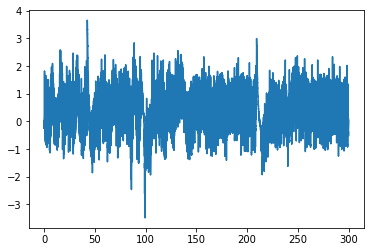

In [7]:
plt.plot(time_data,ecg)

(0.0, 6.0)

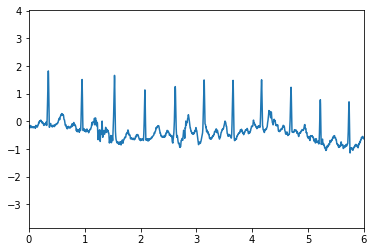

In [8]:
plt.plot(time_data, ecg)
plt.xlim(0,6)

In [9]:
rmsVesta = pd.read_csv('/content/drive/MyDrive/INDQ_share/Technical data resources_Dr.Gayathri/documentation/Abdomenal_ecg_protocentral/abdomen ecg on 02\02\2022/Excel reference/vestav2.csv')

FileNotFoundError: ignored

In [ ]:
test_ti = pd.read_csv('/content/drive/MyDrive/INDQ_share/Technical data resources_Dr.Gayathri/documentation/Abdomenal_ecg_protocentral/test/two.csv')

In [ ]:
protoUpdated = pd.read_csv('/content/drive/MyDrive/INDQ_share/Technical data resources_Dr.Gayathri/documentation/Abdomenal_ecg_protocentral/test/Alam_two.csv')

In [ ]:
rmsData = pd.read_csv('/content/drive/MyDrive/INDQ_share/Technical data resources_Dr.Gayathri/documentation/Abdomenal_ecg_protocentral/test/vestav2.csv')

In [ ]:
rmsData_page = pd.read_csv('/content/drive/MyDrive/INDQ_share/Technical data resources_Dr.Gayathri/documentation/Abdomenal_ecg_protocentral/test/vesta_rms_test.csv')

In [10]:
data8 = pd.read_csv('/content/drive/MyDrive/INDQ_share/Technical data resources_Dr.Gayathri/documentation/Abdomenal_ecg_protocentral/Abdomen ECG recordings on 20 01 2022/test file/Video8.csv')

In [11]:
data9 = pd.read_csv('/content/drive/MyDrive/INDQ_share/Technical data resources_Dr.Gayathri/documentation/Abdomenal_ecg_protocentral/Abdomen ECG recordings on 20 01 2022/test file/Video9.csv')

In [ ]:
data9

In [ ]:
data8

In [12]:
# ch1_data8 = data8.iloc[0:110]

ch1_data9 = data9.iloc[0:410,0]
ch1_data8 =data8.iloc[450:802,0]
# ch1_data8

In [13]:
def center(x):
    mean = np.mean(x, axis=0)
    centered =  x - mean
    return centered, mean

In [14]:
raw_test_data = data9.iloc[500:,0]
Xc, me = center(raw_test_data)

In [15]:
rmsData['I']

NameError: ignored

In [16]:
rmsData_page_x =rmsData_page['I'][2000:4700]

NameError: ignored

In [ ]:
rmsData_page_x_centered, meanRms= center(rmsData_page_x)
plt.plot(rmsData_page_x_centered)

In [ ]:
plt.plot(rmsData['II'])

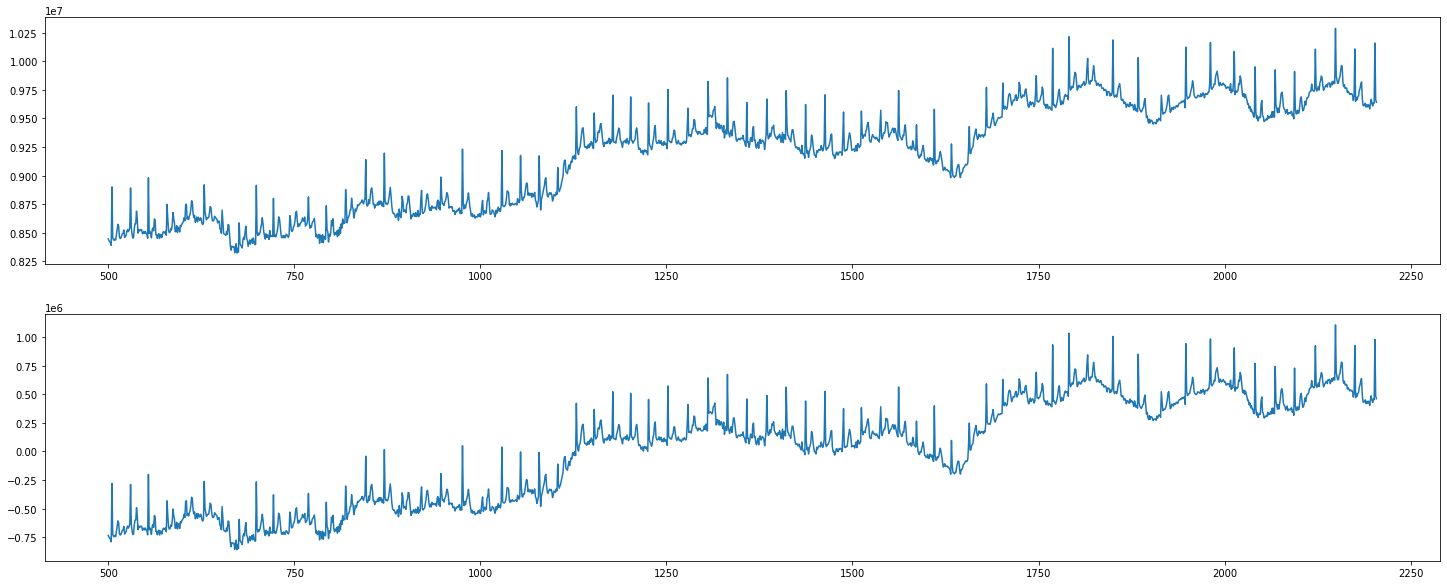

In [17]:
fig, ax = plt.subplots(2,1, figsize=[25,10])
ax[0].plot(raw_test_data)
ax[1].plot(Xc)

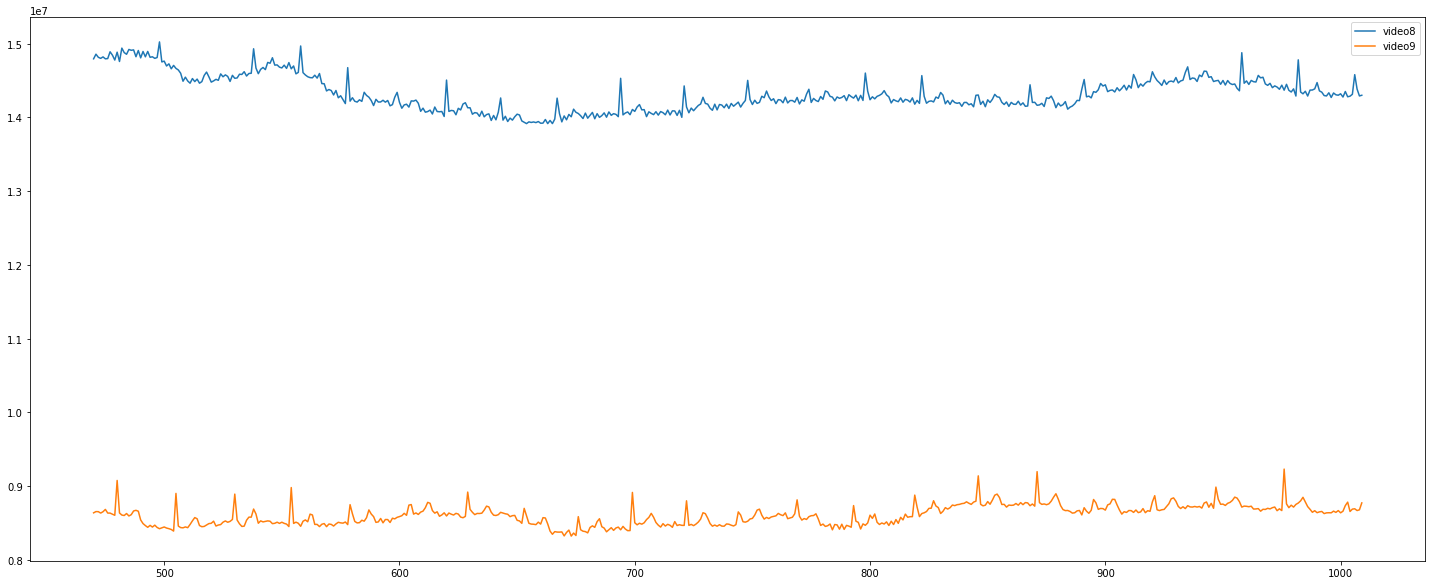

In [18]:
ch1_data9 = data9.iloc[470:1010,0]
ch1_data8 =data8.iloc[470:1010,0]
fig, ax = plt.subplots(figsize=(25,10))
ax.plot(ch1_data8, label='video8')
ax.plot(ch1_data9, label='video9')
ax.legend()

In [56]:
def lpf(x, index):
	y = x.copy()
	
	for n in x.index:
		if(n < 12):
			continue
		y.iloc[n,index] = 2*y.iloc[n-1,index] - y.iloc[n-2,index] + x.iloc[n,index] - 2*x.iloc[n-6,index] + x.iloc[n-12,index]
	return y


#high-pass filter
def hpf(x, index):
	y = x.copy()
	
	for n in x.index:
		if(n < 32):
			continue
		y.iloc[n,index] = y.iloc[n-1,index] - x.iloc[n,index]/32 + x.iloc[n-16,index] - x.iloc[n-17,index] + x.iloc[n-32,index]/32
	return y


RangeIndex(start=500, stop=2205, step=1)


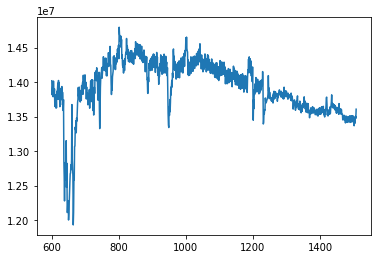

In [48]:
print(Xc.index)
# Xc.iloc[10]
plt.plot(data8.iloc[600:,1])
# data8.shape

In [130]:
# apply a 3-pole lowpass filter at 0.1x Nyquist frequency
b, a = scipy.signal.butter(3, 0.9, 'lowpass')
f4 = scipy.signal.filtfilt(b, a, data8.iloc[500:,0])
b, a = scipy.signal.butter(3, 0.05, 'highpass')
f5 = scipy.signal.filtfilt(b, a, data8.iloc[500:,0])

b, a = scipy.signal.butter(3, [0.05, .1], 'band')
f6 = scipy.signal.lfilter(b, a, data8.iloc[500:,0])

In [104]:
f1 =lpf(data8,0)
f2 =hpf(data8,0)
# f3 = lpf(f4,0)

In [72]:
f1.shape

(1509, 3)

In [120]:
f6.shape

(1009,)

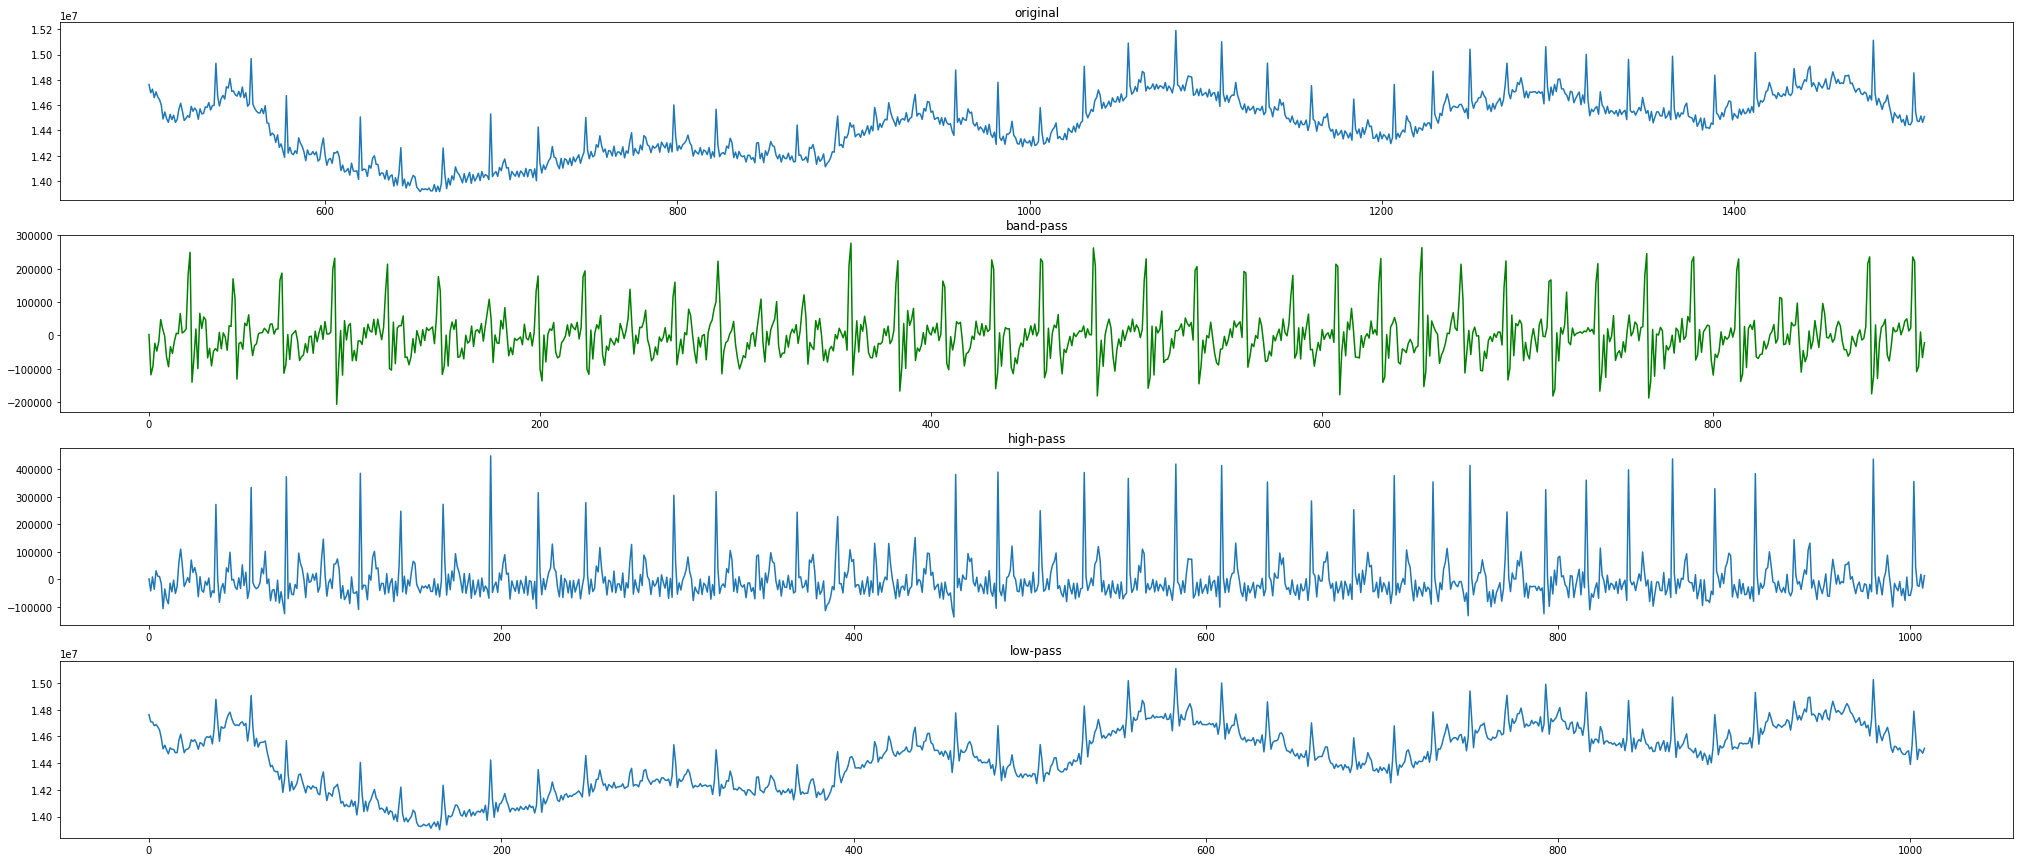

In [180]:
# apply a 3-pole lowpass filter at 0.1x Nyquist frequency
b, a = scipy.signal.butter(3, 0.8, 'lowpass')
f4 = scipy.signal.filtfilt(b, a, data8.iloc[500:,0])
b, a = scipy.signal.butter(3, 0.05, 'highpass')
f5 = scipy.signal.filtfilt(b, a, data8.iloc[500:,0])

b, a = scipy.signal.butter(3, [0.05, 0.8], 'band') #[high, low]
f6 = scipy.signal.lfilter(b, a, data8.iloc[500:,0])


fig, ax = plt.subplots(4,1, figsize=(35,15))
ax[0].set_title("original")
ax[0].plot(data8.iloc[500:,0])
# ax[1].plot(.)
ax[2].set_title("high-pass")
ax[2].plot(f5)

# ax[2].plot(f2.iloc[500:,0])
ax[1].set_title("band-pass")

ax[1].plot(f6[100:],'g')
ax[3].set_title("low-pass")

ax[3].plot(f4)
# ax[2].plot(f2)

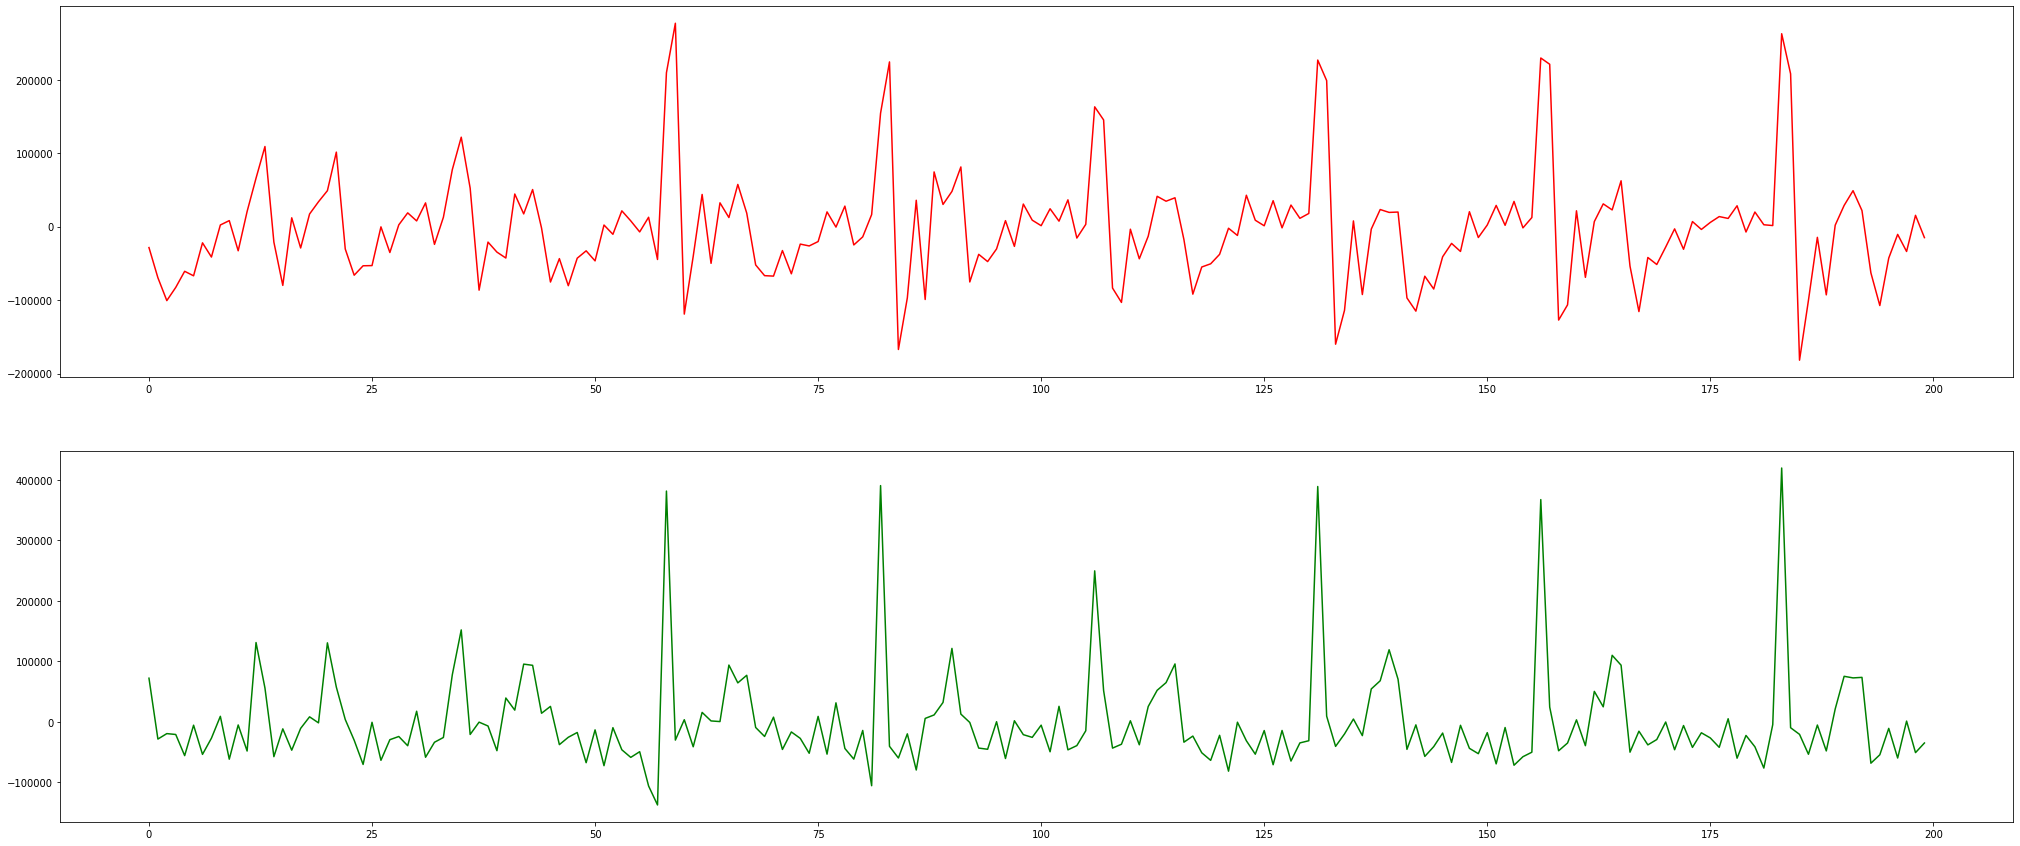

In [189]:
fig, ax= plt.subplots(2,1,figsize=(35,15))
ax[0].plot(f6[400:600], 'r')
ax[1].plot(f5[400:600], 'g')

548608.0 548352


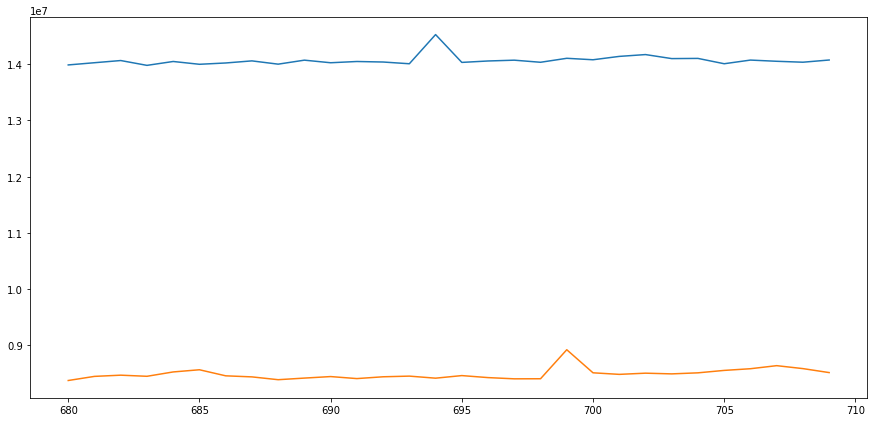

In [109]:
#comparing max values
ch1_data9_val = data9.iloc[680:710,0]
ch1_data8_val =data8.iloc[680:710,0]
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(ch1_data8_val, label='video8')
ax.plot(ch1_data9_val, label='video9')
print(np.max(ch1_data8_val)-np.min(ch1_data8_val), np.max(ch1_data9_val)- np.min(ch1_data9_val))


In [20]:
np.max(np.arange(10))
# np.arange(10)

9

NameError: ignored

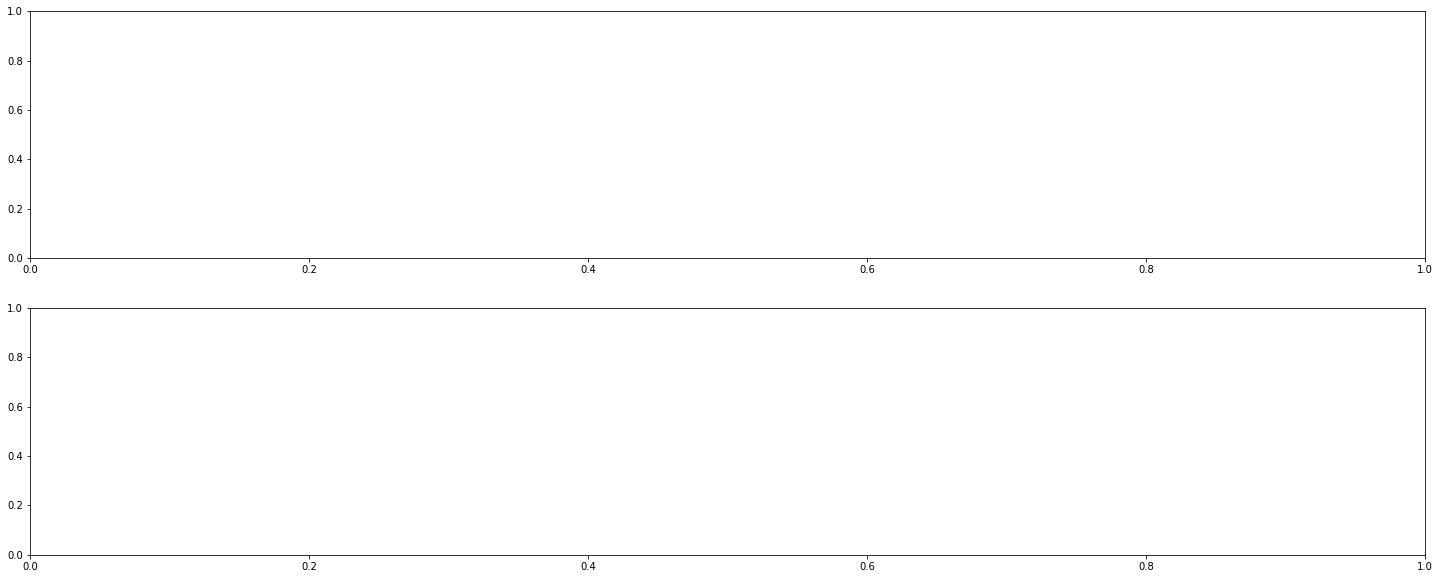

In [21]:

fig, ax = plt.subplots(2,1, figsize=(25,10))
ax[0].plot(rmsData_page_x_centered)
ax[0].set_title('RMS vista')
ax[1].plot(Xc[500:700])
ax[1].set_title('protocentral')
# ax[2].plot()


# Comparing parameters:
# 1) rate of aquiring data.
# 2) Range of values.
# 3) Filters
# 4) Standard Config
# 5) steadiness of mean value